<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/1.Model-Simulation/Valvula_plus_Tanque_emPOO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo feito com auxilio do Chat GPT
# Simulação de Tanque e Válvula com POO

A ideia apresentada é modelar um tanque com uma válvula de saída que pode operar de diferentes maneiras (linear, quadrática, ou exponencial), utilizando Programação Orientada a Objetos (POO) para modularidade e extensibilidade.


In [1]:
import numpy as  np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 1. Classe Base para a Válvula

In [10]:
class Valvula:
    def __init__(self, Rv):
        """
        Classe base para uma válvula genérica.

        Args:
            Rv: Resistência hidráulica da válvula.
        """
        self.Rv = Rv

    def calcular_vazao(self, h):
        """
        Calcula a vazão com base na altura do tanque.
        Este método deve ser sobrescrito pelas subclasses.
        """
        raise NotImplementedError("Este método deve ser implementado na subclasse!")



# 2. Subclasses para Diferentes Tipos de Válvulas

In [3]:
class ValvulaLinear(Valvula):
    def calcular_vazao(self, h):
        """
        Válvula linear: q = h / Rv
        """
        return h / self.Rv

class ValvulaQuadratica(Valvula):
    def calcular_vazao(self, h):
        """
        Válvula quadrática: q = (h^2) / Rv
        """
        return (h**2) / self.Rv

class ValvulaExpoente(Valvula):
    def __init__(self, Rv, n):
        super().__init__(Rv)
        self.n = n  # Expoente da válvula

    def calcular_vazao(self, h):
        """
        Válvula com expoente variável: q = (h^n) / Rv
        """
        return (h**self.n) / self.Rv


# 3. Classe para o Tanque com Acoplamento de Válvula

In [5]:
class Tanque:
    def __init__(self, A, valvula):
        """
        Inicializa o tanque com uma válvula conectada.

        Args:
            A: Área da seção transversal do tanque.
            valvula: Instância da classe Valvula.
        """
        self.A = A
        self.valvula = valvula  # Válvula acoplada

    def modelo(self, t, x, u):
        """
        Modelo do tanque com a válvula acoplada.

        Args:
            t: Tempo (não utilizado diretamente).
            x: Lista de variáveis de estado (altura do tanque).
            u: Lista de entradas do sistema (vazão de entrada).

        Returns:
            dxdt: Derivadas das variáveis de estado.
        """
        h = x[0]  # Altura do tanque
        q0 = u[0]  # Vazão de entrada
        q = self.valvula.calcular_vazao(h)  # Vazão de saída pela válvula
        dhdt = (q0 - q) / self.A  # Taxa de variação do nível
        return [dhdt]

    def simular(self, x0, u0, tspan, metodo='BDF'):
        """
        Simula o tanque com a válvula acoplada.

        Args:
            x0: Condição inicial do nível do tanque.
            u0: Entrada constante do sistema.
            tspan: Intervalo de tempo [t_inicial, t_final].
            metodo: Método numérico para integração.

        Returns:
            Solução da simulação.
        """
        modelo = lambda t, x: self.modelo(t, x, u0)
        sol = solve_ivp(modelo, tspan, x0, method=metodo)
        return sol


# Exemplo de Uso

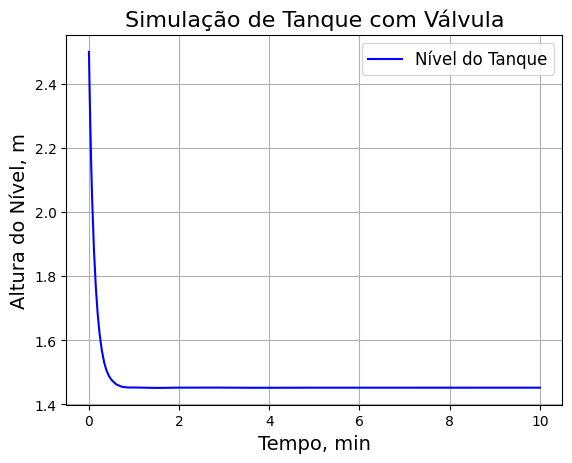

In [9]:
# Parâmetros do tanque
A = 1.0  # Área da seção transversal
h0 = 2.5  # Altura inicial
q0 = 10.0  # Vazão de entrada
u0 = [q0 - 3.0]  # Vazão ajustada
tspan = [0, 10.0]  # Intervalo de tempo

# Escolha da válvula (linear, quadrática ou com expoente)
# valvula_escolhida = ValvulaLinear(Rv=0.25)  # Troque por ValvulaQuadratica ou ValvulaExpoente
# valvula_escolhida = ValvulaQuadratica(Rv=0.25)
valvula_escolhida = ValvulaExpoente(Rv=0.25, n=1.5)

# Instancia o tanque com a válvula escolhida
tanque = Tanque(A, valvula_escolhida)

# Simula o sistema
sol = tanque.simular([h0], u0, tspan)

# Resultados
t = sol.t  # Tempo
h = sol.y.flatten()  # Altura do nível

plt.plot(t, h, 'b-', label='Nível do Tanque')
plt.ylabel('Altura do Nível, m', fontsize=14)
plt.xlabel('Tempo, min', fontsize=14)
plt.title('Simulação de Tanque com Válvula', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# Vantagens Dessa Abordagem

1. Escolha Dinâmica:
* O usuário pode selecionar o tipo de válvula (`ValvulaLinear`, `ValvulaQuadratica`, etc.) no momento da simulação.
* Novos tipos de válvulas podem ser adicionados facilmente como subclasses.

2. Modularidade:
* O tanque e as válvulas estão desacoplados, permitindo testes individuais.
* Substituir ou modificar uma válvula não exige mudanças na classe `Tanque`.

3. Interatividade:
* É possível construir uma interface (via GUI ou CLI) para permitir que o usuário selecione a válvula de forma interativa.

4. Aprendizado Aplicado:
* Alunos podem implementar novos comportamentos para válvulas ou sistemas mais complexos conectando múltiplos tanques e válvulas.


Essa abordagem é poderosa para ensinar conceitos de modelagem, modularidade e a importância da abstração em sistemas de engenharia.